In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils
from pykin.utils.transform_utils import get_inverse_homogeneous



def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-bbfc827d-95d2-432e-920c-d78047c0f0e8.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

In [2]:
np.__version__

'1.19.5'

In [3]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [4]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 1 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(9) -> A(13) -> S'(17) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(17) -> A(20) -> S'(23) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(23) -> A(25) -> S'(31) Reward : 4.0
[Action] Rearr can0
placed another place not goal
[Reward] S(31) -> A(32) -> S'(40) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(40) -> A(44) -> S'(47) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(47) -> A(52) -> S'(55) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(55) -> A(60) -> S'(62) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(62) -> A(65) -> S'(69) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(69) -> A(73) -> S'(76) Reward 

[Action] Rearr milk0
Good Action
[Reward] S(361) -> A(366) -> S'(368) Reward : 6.667
[Action] Rearr cereal0
placed another place not goal
[Reward] S(368) -> A(373) -> S'(375) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(375) -> A(378) -> S'(381) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(381) -> A(383) -> S'(388) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(388) -> A(393) -> S'(394) Reward : 2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(394) -> A(396) -> S'(400) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(400) -> A(402) -> S'(405) Reward : -2.5
[Action] Rearr ben_cube0
Bad Action
[Reward] S(405) -> A(406) -> S'(411) Reward : -2.222
[Action] Rearr can1
Good Action
[Reward] S(411) -> A(415) -> S'(417) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  6.519387722015381 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 7 ==

[Action] Rearr can0
Good Action
[Reward] S(679) -> A(681) -> S'(687) Reward : 5.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(687) -> A(692) -> S'(695) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(695) -> A(696) -> S'(702) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(702) -> A(709) -> S'(710) Reward : 2.857
[Action] Rearr milk0
Good Action
[Reward] S(710) -> A(717) -> S'(718) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(718) -> A(720) -> S'(725) Reward : 2.222
[Action] Rearr can1
placed another place not goal
[Reward] S(725) -> A(727) -> S'(731) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(731) -> A(735) -> S'(736) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  11.656763553619385 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 12 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) ->

[Action] Rearr milk0
Bad Action
[Reward] S(985) -> A(989) -> S'(992) Reward : -4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(992) -> A(997) -> S'(999) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(999) -> A(1002) -> S'(1006) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(1006) -> A(1010) -> S'(1014) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1014) -> A(1016) -> S'(1021) Reward : 2.0
[Action] Rearr cereal0
Good Action
[Reward] S(1021) -> A(1027) -> S'(1028) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  16.507747173309326 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 17 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(9) -> A(14) -> S'(1029) Reward : 6.667
[Action] Rearr can0
placed another place not goal
[Reward

[Action] Rearr can1
placed another place not goal
[Reward] S(1293) -> A(1297) -> S'(1301) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1301) -> A(1302) -> S'(1308) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1308) -> A(1314) -> S'(1316) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(1316) -> A(1321) -> S'(1323) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  21.421011447906494 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 22 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(220) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(220) -> A(221) -> S'(1324) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1324) -> A(1326) -> S'(1332) Reward : 5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1332) -> A(1335) -> S'(1339) Reward : -1
[Action] Rearr b

[Action] Rearr ben_cube0
Good Action
[Reward] S(1601) -> A(1603) -> S'(1609) Reward : 2.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1609) -> A(1615) -> S'(1617) Reward : -1
Exceeded the maximum depth!!
########### Running time :  26.472890853881836 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 27 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(361) -> A(364) -> S'(1618) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(1618) -> A(1621) -> S'(1624) Reward : -6.667
[Action] Rearr milk0
Good Action
[Reward] S(1624) -> A(1629) -> S'(1631) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1631) -> A(1637) -> S'(1639) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1639) -> A(1640) -> S'(1645) Reward : 2.857
[Action] Rearr cereal0
placed another place not goal
[Reward

[Action] Rearr ben_cube0
Bad Action
[Reward] S(1902) -> A(1903) -> S'(1909) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  31.73501944541931 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 32 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(9) -> A(15) -> S'(1910) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1910) -> A(1913) -> S'(1918) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(1918) -> A(1926) -> S'(1927) Reward : 4.0
[Action] Rearr can1
placed another place not goal
[Reward] S(1927) -> A(1931) -> S'(1935) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1935) -> A(1937) -> S'(1941) Reward : -1
[Action] Rearr cereal0
Bad Action
[Reward] S(1941) -> A(1948) -> S'(1949) Reward : -2.857
[Action] Rearr can1
Good Action
[Rewa

[Action] Rearr cereal0
placed another place not goal
[Reward] S(2212) -> A(2219) -> S'(2220) Reward : -1
Exceeded the maximum depth!!
########### Running time :  36.61645531654358 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 37 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(220) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(220) -> A(221) -> S'(1324) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(1324) -> A(1325) -> S'(2221) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2221) -> A(2227) -> S'(2229) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2229) -> A(2235) -> S'(2237) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(2237) -> A(2240) -> S'(2245) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2245) -> A(2251) -> S'(2253) Reward : -1


[Action] Rearr can1
Bad Action
[Reward] S(2484) -> A(2487) -> S'(2492) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  40.823617696762085 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 42 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(679) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(679) -> A(680) -> S'(2493) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(2493) -> A(2499) -> S'(2501) Reward : 4.0
[Action] Rearr can0
Good Action
[Reward] S(2501) -> A(2505) -> S'(2510) Reward : 3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(2510) -> A(2512) -> S'(2518) Reward : 2.857
[Action] Rearr cereal0
Good Action
[Reward] S(2518) -> A(2524) -> S'(2525) Reward : 2.5
[Action] Rearr can1
Good Action
[Reward] S(2525) -> A(2529) -> S'(253

[Action] Rearr can1
placed another place not goal
[Reward] S(2747) -> A(2750) -> S'(2755) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(2755) -> A(2758) -> S'(2761) Reward : -2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2761) -> A(2767) -> S'(2769) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2769) -> A(2771) -> S'(2776) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  45.562379360198975 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 48 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(153) -> A(158) -> S'(2652) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2652) -> A(2653) -> S'(2777) Reward : -6.667
[Action] Rearr can1
placed another place not goal
[Reward] S(2777) -> A(2780) -> S'(2785) Reward : -1
[Action] Rearr can0
Good Action
[Reward] 

[Action] Rearr cereal0
Good Action
[Reward] S(3017) -> A(3024) -> S'(3025) Reward : 2.222
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3025) -> A(3026) -> S'(3032) Reward : -2.222
[Action] Rearr can1
Good Action
[Reward] S(3032) -> A(3036) -> S'(3039) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  49.95735502243042 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 53 ===========
[Action] Rearr cereal0
placed another place not goal
[Reward] S(0) -> A(8) -> S'(9) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(679) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(679) -> A(682) -> S'(3040) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3040) -> A(3046) -> S'(3048) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3048) -> A(3055) -> S'(3057) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3057)

Good Action
[Reward] S(3302) -> A(3306) -> S'(3309) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(3309) -> A(3313) -> S'(3315) Reward : -1
Exceeded the maximum depth!!
########### Running time :  54.843414068222046 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 58 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(77) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(77) -> A(82) -> S'(3316) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(3316) -> A(3318) -> S'(3324) Reward : 5.0
[Action] Rearr can1
Good Action
[Reward] S(3324) -> A(3328) -> S'(3333) Reward : 4.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3333) -> A(3334) -> S'(3341) Reward : -4.0
[Action] Rearr can0
placed another place not goal
[Reward] S(3341) -> A(3342) -> S'(3349) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(3349) -> A(3356) -> S'(33

[Action] Rearr cereal0
Good Action
[Reward] S(3596) -> A(3603) -> S'(3604) Reward : 4.0
[Action] Rearr can1
placed another place not goal
[Reward] S(3604) -> A(3608) -> S'(3612) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(3612) -> A(3614) -> S'(3619) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3619) -> A(3624) -> S'(3626) Reward : 2.5
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3626) -> A(3627) -> S'(3633) Reward : -2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(3633) -> A(3634) -> S'(3640) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(3640) -> A(3644) -> S'(3646) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  60.5808162689209 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 64 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(418) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(418) ->

[Action] Rearr can0
Good Action
[Reward] S(3873) -> A(3876) -> S'(3880) Reward : 2.857
[Action] Rearr cereal0
placed another place not goal
[Reward] S(3880) -> A(3885) -> S'(3887) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(3887) -> A(3889) -> S'(3891) Reward : -2.5
[Action] Rearr cereal0
Good Action
[Reward] S(3891) -> A(3897) -> S'(3898) Reward : 2.0
[Action] Rearr can0
placed another place not goal
[Reward] S(3898) -> A(3900) -> S'(3905) Reward : -1
Exceeded the maximum depth!!
########### Running time :  64.86526250839233 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 69 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(77) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(77) -> A(83) -> S'(3378) Reward : 6.667
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3378) -> A(3379) -> S'(3906) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(39

[Action] Rearr cereal0
Good Action
[Reward] S(4142) -> A(4147) -> S'(4148) Reward : 2.222
[Action] Rearr milk0
placed another place not goal
[Reward] S(4148) -> A(4152) -> S'(4154) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(4154) -> A(4155) -> S'(4159) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  69.57027006149292 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 74 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(418) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(418) -> A(421) -> S'(1677) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1677) -> A(1678) -> S'(4160) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(4160) -> A(4167) -> S'(4169) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(4169) -> A(4175) -> S'(4178) Reward : 3.333
[Action] Rearr can0
placed 

[Action] Rearr can0
Good Action
[Reward] S(4414) -> A(4417) -> S'(4420) Reward : 2.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4420) -> A(4423) -> S'(4426) Reward : -1
Exceeded the maximum depth!!
########### Running time :  73.71674680709839 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 79 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(77) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(77) -> A(84) -> S'(3481) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3481) -> A(3482) -> S'(4427) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(4427) -> A(4432) -> S'(4435) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(4435) -> A(4437) -> S'(4444) Reward : 3.333
[Action] Rearr can0
placed another place not goal
[Reward] S(4444) -> A(4445) -> S'(4453) Reward : -1
[Action] Rear

[Action] Rearr ben_cube0
Bad Action
[Reward] S(4679) -> A(4680) -> S'(4684) Reward : -2.5
[Action] Rearr can0
Bad Action
[Reward] S(4684) -> A(4685) -> S'(4691) Reward : -2.222
[Action] Rearr can1
placed another place not goal
[Reward] S(4691) -> A(4694) -> S'(4699) Reward : -1
Exceeded the maximum depth!!
########### Running time :  78.40509486198425 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 84 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(153) -> A(154) -> S'(800) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(800) -> A(801) -> S'(4700) Reward : -6.667
[Action] Rearr can0
Good Action
[Reward] S(4700) -> A(4702) -> S'(4708) Reward : 4.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(4708) -> A(4715) -> S'(4716) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(4716) -> A(4719) -> S

[Action] Rearr can0
placed another place not goal
[Reward] S(4957) -> A(4960) -> S'(4964) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(4964) -> A(4966) -> S'(4970) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  82.43510150909424 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 89 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(361) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(361) -> A(365) -> S'(1797) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1797) -> A(1798) -> S'(4971) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(4971) -> A(4973) -> S'(4979) Reward : 4.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4979) -> A(4983) -> S'(4987) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(4987) -> A(4990) -> S'(4992) Reward : -3.333
[Action] Rearr cereal0
placed another place not g

[Action] Rearr can1
Bad Action
[Reward] S(5225) -> A(5228) -> S'(5231) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  86.49391984939575 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 94 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr milk0
Good Action
[Reward] S(153) -> A(159) -> S'(2679) Reward : 6.667
[Action] Rearr can0
Good Action
[Reward] S(2679) -> A(2682) -> S'(5232) Reward : 5.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(5232) -> A(5237) -> S'(5239) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(5239) -> A(5242) -> S'(5245) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(5245) -> A(5249) -> S'(5250) Reward : 2.857
[Action] Rearr can1
placed another place not goal
[Reward] S(5250) -> A(5253) -> S'(5256) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(5256) -> A(5258) -> S'(5

[Action] Rearr can0
Good Action
[Reward] S(5474) -> A(5478) -> S'(5483) Reward : 3.333
[Action] Rearr milk0
Good Action
[Reward] S(5483) -> A(5489) -> S'(5492) Reward : 2.857
[Action] Rearr can0
Bad Action
[Reward] S(5492) -> A(5495) -> S'(5500) Reward : -2.857
[Action] Rearr can1
Good Action
[Reward] S(5500) -> A(5504) -> S'(5507) Reward : 2.222
[Action] Rearr can0
placed another place not goal
[Reward] S(5507) -> A(5510) -> S'(5515) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(5515) -> A(5517) -> S'(5522) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  91.96657347679138 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 100 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(153) Reward : 10.0
[Action] Rearr can1
placed another place not goal
[Reward] S(153) -> A(156) -> S'(1208) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1208) -> A(1209) -> S'(5523) R

In [5]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

mcts.history_level_1_dict

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

Result 3 :  [0, 2, 153, 159, 2679, 2684, 2687, 2690, 2693, 2696, 2700, 2703, 2706, 2711, 2712]
state num : 15


In [8]:
state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

state_list, action_list

for i in range(len(max_value_nodes)//2):
    print("current state : ", max_value_nodes[2*i])
    print("action : ", max_value_nodes[2*i + 1])
    print("next state : ", max_value_nodes[2*(i+1)])
    
    print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    current_state_pc, current_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    next_state_pc, next_count = pc_utils.get_obj_point_clouds(
                                rearrangement1.init_scene,
                                mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                                )
    
    print()
    
    if i>6:
        break
    

current state :  0
action :  2
next state :  153
manipulate object ben_cube0

current state :  153
action :  159
next state :  2679
manipulate object milk0

current state :  2679
action :  2684
next state :  2687
manipulate object can1

current state :  2687
action :  2690
next state :  2693
manipulate object milk0

current state :  2693
action :  2696
next state :  2700
manipulate object can0

current state :  2700
action :  2703
next state :  2706
manipulate object milk0

current state :  2706
action :  2711
next state :  2712
manipulate object cereal0



In [9]:
combined_pc = pc_utils.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'],
                                        current_state_pc,
                                        next_state_pc,
                                        next_count
                                       )
mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

'cereal0'

5000
cereal0


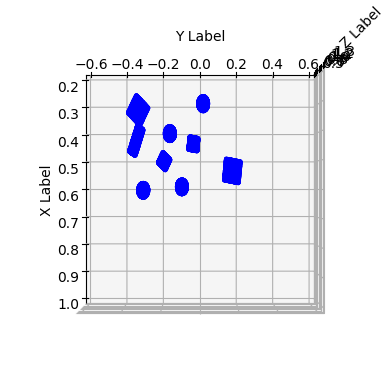

In [10]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))
print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_pc[:, 0], combined_pc[:, 1], combined_pc[:, 2], c='b', marker='.')

ax.set_xlim(.2,1.0)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

all_pc = np.vstack([combined_pc, table_point_cloud])

pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)
# Set the camera viewpoint

# Set point size and color
# scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

In [11]:
all_pc

array([[ 0.49736641,  0.16893035,  0.8732406 ],
       [ 0.52879604,  0.21067811,  0.82889539],
       [ 0.49814297,  0.17467876,  0.82298231],
       ...,
       [ 0.4126776 , -0.02943201,  0.80829998],
       [ 0.91436962,  0.45128946,  0.80829998],
       [ 0.52994522, -0.27487987,  0.80829998]])

In [12]:
T_cam = np.array([[ 6.12323400e-17, -8.66025404e-01,  5.00000000e-01,
         1.60000008e-01],
       [ 1.00000000e+00,  5.30287619e-17, -3.06161700e-17,
         6.34369494e-01],
       [-0.00000000e+00,  5.00000000e-01,  8.66025404e-01,
         1.63132538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

w_T_cam = rearrangement1.table_pose.h_mat @ T_cam 

w_T_cam = w_T_cam.dot(
            trimesh.transformations.euler_matrix(np.pi, 0, 0)
        )

cam_T_w = get_inverse_homogeneous(w_T_cam)

In [13]:
ones_arr = np.full((len(all_pc), 1), 1)


In [14]:
w_pc = np.hstack((all_pc, ones_arr))

In [15]:
cam_pc =  np.dot(cam_T_w, w_pc.T).T

In [23]:
np.max(cam_pc[:,2])

1.1417833831915565

# Contact GraspNet

In [24]:
import os
import sys
import argparse
import numpy as np
import time
import glob
import cv2

import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('/home/juju/contact_graspnet/contact_graspnet/inference.py')))
sys.path.append(os.path.join(BASE_DIR))
sys.path.append(os.path.join('/home/juju/contact_graspnet/contact_graspnet'))

import config_utils
from data import regularize_pc_point_count, depth2pc, load_available_input_data

from contact_graspnet import contact_graspnet

from contact_grasp_estimator import GraspEstimator
from visualization_utils import visualize_grasps, show_image

In [25]:
parser = argparse.ArgumentParser()
parser.add_argument('--ckpt_dir', default='checkpoints/scene_test_2048_bs3_hor_sigma_001', help='Log dir [default: checkpoints/scene_test_2048_bs3_hor_sigma_001]')
parser.add_argument('--np_path', default='test_data/7.npy', help='Input data: npz/npy file with keys either "depth" & camera matrix "K" or just point cloud "pc" in meters. Optionally, a 2D "segmap"')
parser.add_argument('--png_path', default='', help='Input data: depth map png in meters')
parser.add_argument('--K', default=None, help='Flat Camera Matrix, pass as "[fx, 0, cx, 0, fy, cy, 0, 0 ,1]"')
parser.add_argument('--z_range', default=[0.2,1.8], help='Z value threshold to crop the input point cloud')
parser.add_argument('--local_regions', action='store_true', default=False, help='Crop 3D local regions around given segments.')
parser.add_argument('--filter_grasps', action='store_true', default=False,  help='Filter grasp contacts according to segmap.')
parser.add_argument('--skip_border_objects', action='store_true', default=False,  help='When extracting local_regions, ignore segments at depth map boundary.')
parser.add_argument('--forward_passes', type=int, default=1,  help='Run multiple parallel forward passes to mesh_utils more potential contact points.')
parser.add_argument('--segmap_id', type=int, default=0,  help='Only return grasps of the given object id')
parser.add_argument('--arg_configs', nargs="*", type=str, default=[], help='overwrite config parameters')

FLAGS = parser.parse_args(args=[])

In [26]:
global_config = config_utils.load_config(FLAGS.ckpt_dir, batch_size=FLAGS.forward_passes, arg_configs=FLAGS.arg_configs)

In [27]:
global_config

{'DATA': {'scene_contacts_path': 'acronym/scene_contacts',
  'gripper_width': 0.08,
  'input_normals': False,
  'use_uniform_quaternions': False,
  'view_sphere': {'elevation': [30, 150], 'distance_range': [0.9, 1.3]},
  'train_on_scenes': True,
  'labels': {'to_gpu': False,
   'bin_weights': [0.16652107,
    0.21488856,
    0.37031708,
    0.55618503,
    0.75124664,
    0.93943357,
    1.07824539,
    1.19423112,
    1.55731375,
    3.17161779],
   'filter_z': True,
   'k': 1,
   'max_radius': 0.005,
   'num_neg_contacts': 0,
   'num_pos_contacts': 8000,
   'offset_bins': [0,
    0.00794435329,
    0.0158887021,
    0.0238330509,
    0.0317773996,
    0.0397217484,
    0.0476660972,
    0.055610446,
    0.0635547948,
    0.0714991435,
    0.08],
   'z_val': -0.1},
  'pc_augm': {'occlusion_nclusters': 0,
   'occlusion_dropout_rate': 0.0,
   'sigma': 0.0,
   'clip': 0.005},
  'depth_augm': {'sigma': 0.001, 'clip': 0.005, 'gaussian_kernel': 0},
  'raw_num_points': 20000,
  'ndataset_poi

In [28]:
## Config를 받아서 GraspEstimatorr Class를 받아옴. 
grasp_estimator = GraspEstimator(global_config)


<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>


In [29]:
grasp_estimator.build_network()

--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


{'pointclouds_pl': <tf.Tensor 'Placeholder:0' shape=(1, 20000, 3) dtype=float32>,
 'cam_poses_pl': <tf.Tensor 'Placeholder_2:0' shape=(1, 4, 4) dtype=float32>,
 'scene_idx_pl': <tf.Tensor 'Placeholder_1:0' shape=() dtype=int32>,
 'is_training_pl': <tf.Tensor 'Placeholder_3:0' shape=() dtype=bool>,
 'grasp_dir_pred': <tf.Tensor 'l2_normalize:0' shape=(1, 2048, 3) dtype=float32>,
 'binary_seg_head': <tf.Tensor 'fc2_seg/BiasAdd:0' shape=(1, 2048, 1) dtype=float32>,
 'binary_seg_pred': <tf.Tensor 'Sigmoid:0' shape=(1, 2048, 1) dtype=float32>,
 'grasp_offset_head': <tf.Tensor 'fc2_off/BiasAdd:0' shape=(1, 2048, 10) dtype=float32>,
 'grasp_offset_pred': <tf.Tensor 'Sigmoid_1:0' shape=(1, 2048, 10) dtype=float32>,
 'approach_dir_pred': <tf.Tensor 'l2_normalize_1:0' shape=(1, 2048, 3) dtype=float32>,
 'pred_points': <tf.Tensor 'layer1/GatherPoint:0' shape=(1, 2048, 3) dtype=float32>,
 'offset_pred_idcs_pc': <tf.Tensor 'ArgMax_1:0' shape=(1, 2048) dtype=int64>,
 'offset_bin_pred_vals': <tf.Tens

In [30]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver(save_relative_paths=True)

# Create a session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True
sess = tf.Session(config=config)

2023-06-08 10:16:33.457168: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 10:16:33.458080: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-08 10:16:33.458162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-06-08 10:16:33.458211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

In [31]:
checkpoint_dir = '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/'

# Load weights
grasp_estimator.load_weights(sess, saver, checkpoint_dir, mode='test')

('loading ', '/home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2023-06-08 10:16:34.526290: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3609600000 Hz


In [32]:
os.makedirs('results', exist_ok=True)

## Don't need Test Data 

# p = "/home/juju/contact_graspnet/test_data/0.npy"
# K=FLAGS.K

# print('Loading ', p)

# pc_segments = {}
# segmap, rgb, depth, cam_K, pc_full, pc_colors = load_available_input_data(p, K=K)


In [33]:
# z_range = [0.2,1.8]

# all_pc, pc_segments, pc_colors = grasp_estimator.extract_point_clouds(depth, cam_K, segmap=segmap, rgb=rgb,
#                                                                         skip_border_objects=False, z_range=z_range)


# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)
# # Set the camera viewpoint

# # Set point size and color
# # scene.set_vertex_colors([0, 255, 0, 255])  # Set point color to green
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

In [34]:
all_pc = cam_pc[:,:3]

In [35]:
pred_grasps_cam, scores, contact_pts, gripper_openings = {}, {}, {}, {}


In [36]:
pred_grasps_cam[-1], scores[-1], contact_pts[-1], gripper_openings[-1] = grasp_estimator.predict_grasps(sess, all_pc, convert_cam_coords=True, forward_passes=FLAGS.forward_passes)


2023-06-08 10:16:55.128310: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-06-08 10:16:55.677302: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-06-08 10:16:56.515812: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-06-08 10:16:56.949997: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


In [37]:
pred_grasps_cam

{-1: array([[[ 0.768009  ,  0.6219533 ,  0.1527619 , -0.2404607 ],
         [-0.31499118,  0.15914935,  0.93565595, -0.23097819],
         [ 0.5576224 , -0.7667109 ,  0.31813794,  0.8585051 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        [[-0.9997601 , -0.00932405,  0.01982048, -0.07419586],
         [ 0.01277377, -0.98325825,  0.18176927, -0.19796361],
         [ 0.01779383,  0.18197885,  0.9831414 ,  0.84497344],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        [[ 0.9078915 , -0.41365102, -0.06801364, -0.31459072],
         [ 0.40777174,  0.8337949 ,  0.3721672 , -0.048568  ],
         [-0.09723791, -0.36562148,  0.9256705 ,  0.8221815 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
 
        ...,
 
        [[-0.98978907,  0.12698211,  0.06475512, -0.07963161],
         [-0.14223532, -0.90956235, -0.39046848, -0.10494139],
         [ 0.00931632, -0.3956919 ,  0.91833615,  0.8706224 ],
         [ 0.        ,  0. 

In [40]:
visualize_grasps(all_pc, pred_grasps_cam, scores, plot_opencv_cam=True, pc_colors=None)


Visualizing...takes time


In [36]:
np.mean(pc_full[:,2])

0.8506203882748812